# 3章
## 3.2

In [30]:
date()

[1] "Wed Oct 05 18:18:35 2016"

In [1]:
sapply(c("pipeR", "ggplot2", "dplyr", "tidyr", "readr"), require, character.only = TRUE)

Loading required package: pipeR
Loading required package: ggplot2
Loading required package: dplyr
Warning message:
: package 'dplyr' was built under R version 3.3.1
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: tidyr
Warning message:
: package 'tidyr' was built under R version 3.3.1Loading required package: readr
Warning message:
: package 'readr' was built under R version 3.3.1

pipeR ggplot2   dplyr   tidyr   readr 
   TRUE    TRUE    TRUE    TRUE    TRUE

In [10]:
options(repr.plot.width = 4, repr.plot.height = 4)

In [3]:
d <- readr::read_csv("data/chap03/data3a.csv")

Parsed with column specification:
cols(
  y = col_integer(),
  x = col_double(),
  f = col_character()
)


`readr` では`factor`ではなく`character`

In [4]:
str(d)

Classes 'tbl_df', 'tbl' and 'data.frame':	100 obs. of  3 variables:
 $ y: int  6 6 6 12 10 4 9 9 9 11 ...
 $ x: num  8.31 9.44 9.5 9.07 10.16 ...
 $ f: chr  "C" "C" "C" "C" ...
 - attr(*, "spec")=List of 2
  ..$ cols   :List of 3
  .. ..$ y: list()
  .. .. ..- attr(*, "class")= chr  "collector_integer" "collector"
  .. ..$ x: list()
  .. .. ..- attr(*, "class")= chr  "collector_double" "collector"
  .. ..$ f: list()
  .. .. ..- attr(*, "class")= chr  "collector_character" "collector"
  ..$ default: list()
  .. ..- attr(*, "class")= chr  "collector_guess" "collector"
  ..- attr(*, "class")= chr "col_spec"


In [5]:
summary(d)

       y               x               f            
 Min.   : 2.00   Min.   : 7.190   Length:100        
 1st Qu.: 6.00   1st Qu.: 9.428   Class :character  
 Median : 8.00   Median :10.155   Mode  :character  
 Mean   : 7.83   Mean   :10.089                     
 3rd Qu.:10.00   3rd Qu.:10.685                     
 Max.   :15.00   Max.   :12.400                     

`factor` にする

In [7]:
d %>>% dplyr::mutate(f = as.factor(f)) -> d
summary(d)

       y               x          f     
 Min.   : 2.00   Min.   : 7.190   C:50  
 1st Qu.: 6.00   1st Qu.: 9.428   T:50  
 Median : 8.00   Median :10.155         
 Mean   : 7.83   Mean   :10.089         
 3rd Qu.:10.00   3rd Qu.:10.685         
 Max.   :15.00   Max.   :12.400         

In [8]:
str(d)

Classes 'tbl_df', 'tbl' and 'data.frame':	100 obs. of  3 variables:
 $ y: int  6 6 6 12 10 4 9 9 9 11 ...
 $ x: num  8.31 9.44 9.5 9.07 10.16 ...
 $ f: Factor w/ 2 levels "C","T": 1 1 1 1 1 1 1 1 1 1 ...


In [9]:
class(d)

[1] "tbl_df"     "tbl"        "data.frame"

## 3.3

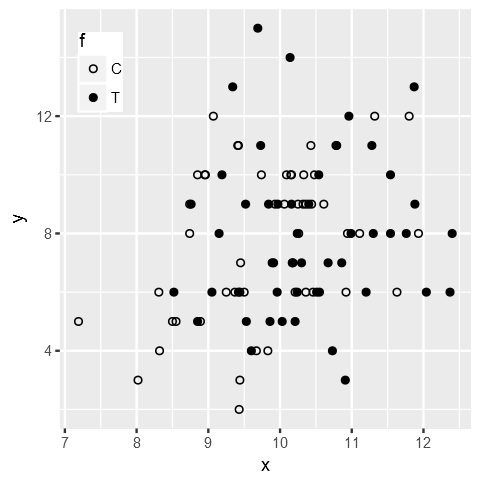

In [11]:
d %>>% 
    ggplot(aes(x = x, y = y, shape = f)) + 
    geom_point() + 
    scale_shape_manual(values = c(21, 19)) + 
    theme(legend.position=c(.1, .85))

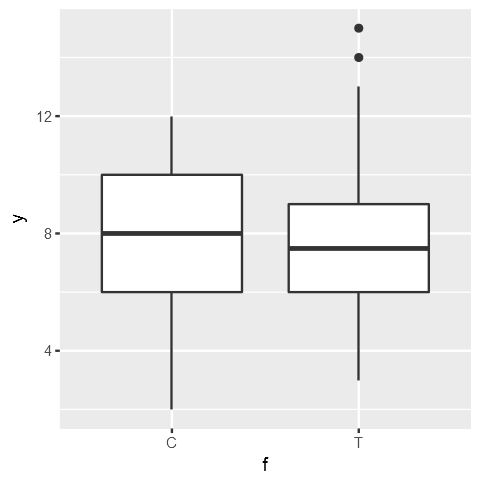

In [12]:
d %>>% 
    ggplot(aes(x = f, y = y)) + 
    geom_boxplot()

## 3.4

* ある個体$i$において種子数が$y_i$である確率$p(y_i | \lambda_i)$ はポアソン分布に従うとする

$$p(y_i | \lambda_i) = \frac{\lambda^{y_i}_i \exp(-\lambda_i)}{y_i}$$

### 3.4.1 線形予測子とリンク関数

ある個体$i$の平均種子数$\lambda_i$は以下の式で表されるとする．

$$\lambda_i = \exp(\beta_1 + \beta_2 x_i)$$

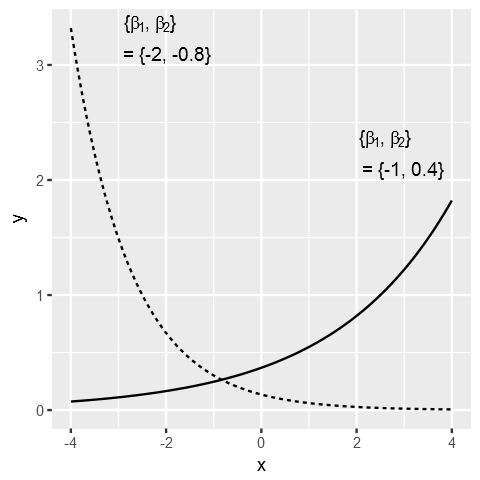

In [13]:
ggplot(data_frame(x = c(-4, 4)), aes(x)) + 
    stat_function(fun = function(x, beta1, beta2){exp(-1 + 0.4 * x)}) + 
    annotate("text", x = -3, y = 3, label = 'atop("{"*beta[1]*", "*beta[2]*"}      ", " = {-2, -0.8}")', parse = TRUE, hjust = 0, vjust = 0) + 
    stat_function(fun = function(x, beta1, beta2){exp(-2 + -0.8 * x)}, linetype = 2) +
    annotate("text", x = 2, y = 2, label = 'atop("{"*beta[1]*", "*beta[2]*"}      ", " = {-1, 0.4}")', parse = TRUE, hjust = 0, vjust = 0)

### 3.4.2

対数尤度

$$ \log L(\beta_1, \beta_2) = \sum_i \log \frac{\lambda^{y_i}_i \exp(-\lambda_i)}{y_i!} $$

In [14]:
fit <- glm(y ~ x, data = d, family = poisson(link = "log"))

In [15]:
fit


Call:  glm(formula = y ~ x, family = poisson(link = "log"), data = d)

Coefficients:
(Intercept)            x  
    1.29172      0.07566  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.99 	AIC: 474.8

In [16]:
summary(fit)


Call:
glm(formula = y ~ x, family = poisson(link = "log"), data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3679  -0.7348  -0.1775   0.6987   2.3760  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.29172    0.36369   3.552 0.000383 ***
x            0.07566    0.03560   2.125 0.033580 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 84.993  on 98  degrees of freedom
AIC: 474.77

Number of Fisher Scoring iterations: 4


In [17]:
logLik(fit)

'log Lik.' -235.3863 (df=2)

### 3.4.3

In [18]:
fit$coefficients[["(Intercept)"]]

[1] 1.291721

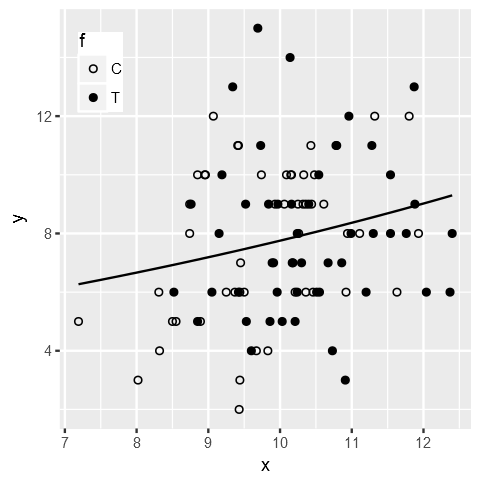

In [19]:
xx <- seq(min(d$x), max(d$x), length = 100)
d %>>% 
    mutate(xx = xx, fitted = exp(fit$coefficients[["(Intercept)"]] + fit$coefficients[["x"]] * xx)) %>>%
    ggplot(aes(x = x, y = y, shape = f)) + 
        geom_point() + 
        geom_line(aes(x = xx, y = fitted), inherit.aes = FALSE) + 
        scale_shape_manual(values = c(21, 19)) + 
        theme(legend.position=c(.1, .85))

## 3.5 説明変数が因子型

$$\lambda_i = \exp(\beta_1 + \beta_3 d_i)$$

$d_i$ は 0（$f_i$ = C） or 1 （$f_i$ = T）

In [20]:
fit.f <- glm(y ~ f, data = d, family = poisson(link = "log"))

In [21]:
fit.f


Call:  glm(formula = y ~ f, family = poisson(link = "log"), data = d)

Coefficients:
(Intercept)           fT  
    2.05156      0.01277  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 89.48 	AIC: 479.3

In [22]:
summary(fit.f)


Call:
glm(formula = y ~ f, family = poisson(link = "log"), data = d)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.47515  -0.69941   0.04264   0.72467   2.25204  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  2.05156    0.05070  40.463   <2e-16 ***
fT           0.01277    0.07148   0.179    0.858    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 89.475  on 98  degrees of freedom
AIC: 479.25

Number of Fisher Scoring iterations: 4


In [23]:
exp(fit.f$coefficients[["(Intercept)"]])

[1] 7.78

In [24]:
exp(fit.f$coefficients[["(Intercept)"]] + fit.f$coefficients[["fT"]])

[1] 7.88

In [25]:
logLik(fit.f)

'log Lik.' -237.6273 (df=2)

## 3.6 説明変数が数量型 + 因子型

$$\lambda_i = \exp(\beta_1 + \beta_2 x_i + \beta_3 d_i)$$


In [26]:
fit.all <- glm(y ~ x + f, data = d, family = poisson(link = "log"))

In [27]:
fit.all


Call:  glm(formula = y ~ x + f, family = poisson(link = "log"), data = d)

Coefficients:
(Intercept)            x           fT  
    1.26311      0.08007     -0.03200  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.81 	AIC: 476.6

In [28]:
summary(fit.all)


Call:
glm(formula = y ~ x + f, family = poisson(link = "log"), data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3977  -0.7337  -0.2023   0.6795   2.4317  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.26311    0.36963   3.417 0.000633 ***
x            0.08007    0.03704   2.162 0.030620 *  
fT          -0.03200    0.07438  -0.430 0.667035    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 89.507  on 99  degrees of freedom
Residual deviance: 84.808  on 97  degrees of freedom
AIC: 476.59

Number of Fisher Scoring iterations: 4


In [29]:
logLik(fit.all)

'log Lik.' -235.2937 (df=3)

施肥なし（C） なら，

$\lambda_i = \exp(1.26 + 0.08 x_i)$

施肥あり（T） なら，

$ \lambda_i = \exp(1.26 + 0.08 x_i -0.032) $

対数リンク関数なので積で効く

$\lambda_i$ = （定数）+（サイズ効果）+（施肥効果）

## 3.7

## 3.8

In [31]:
devtools::session_info()

Session info -------------------------------------------------------------------
Packages -----------------------------------------------------------------------


 setting  value                       
 version  R version 3.3.0 (2016-05-03)
 system   x86_64, mingw32             
 ui       RTerm                       
 language (EN)                        
 collate  Japanese_Japan.932          
 tz       Asia/Tokyo                  
 date     2016-10-05                  

 package    * version    date       source                             
 assertthat   0.1        2013-12-06 CRAN (R 3.3.0)                     
 Cairo        1.5-9      2015-09-26 CRAN (R 3.3.0)                     
 colorspace   1.2-6      2015-03-11 CRAN (R 3.3.0)                     
 crayon       1.3.2      2016-06-28 CRAN (R 3.3.1)                     
 DBI          0.5        2016-08-11 CRAN (R 3.3.1)                     
 devtools     1.12.0     2016-06-24 CRAN (R 3.3.1)                     
 digest       0.6.10     2016-08-02 CRAN (R 3.3.1)                     
 dplyr      * 0.5.0      2016-06-24 CRAN (R 3.3.1)                     
 evaluate     0.9        2016-04-29 CRA